# Finding the first TESS planet candidate
(by Christina Hedges - [@TheChedgehog](https://twitter.com/TheChedgehog), found [here](http://docs.lightkurve.org/tutorials/how-to-recover-the-first-tess-candidate.html))

In [1]:
from lightkurve import TessTargetPixelFile
tpf = TessTargetPixelFile('https://archive.stsci.edu/hlsps/tess-data-alerts/hlsp_tess-data-alerts_tess_phot_00261136679-s01_tess_v1_tp.fits')


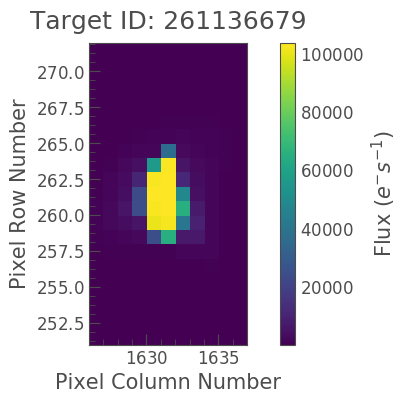

In [3]:
tpf.plot()

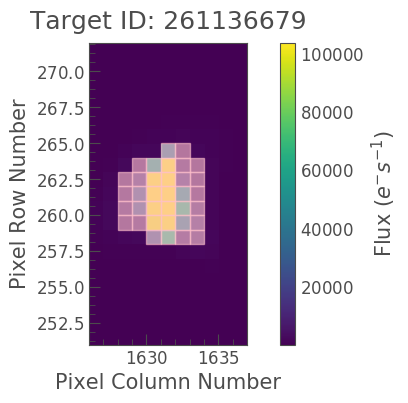

In [4]:
import numpy as np

# Create a median image of the source over time
median_image = np.nanmedian(tpf.flux, axis=0)

# Select pixels which are brighter than the 85th percentile of the median image
aperture_mask = median_image > np.nanpercentile(median_image, 85)

# Plot that aperture
tpf.plot(aperture_mask=aperture_mask);

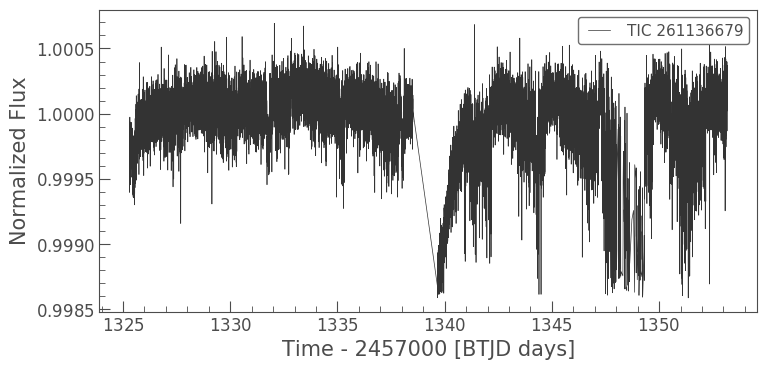

In [5]:
lc = tpf.to_lightcurve(aperture_mask = aperture_mask).remove_outliers()
lc.plot()

/usr/local/lib/python3.6/site-packages/scipy/linalg/basic.py:1226: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


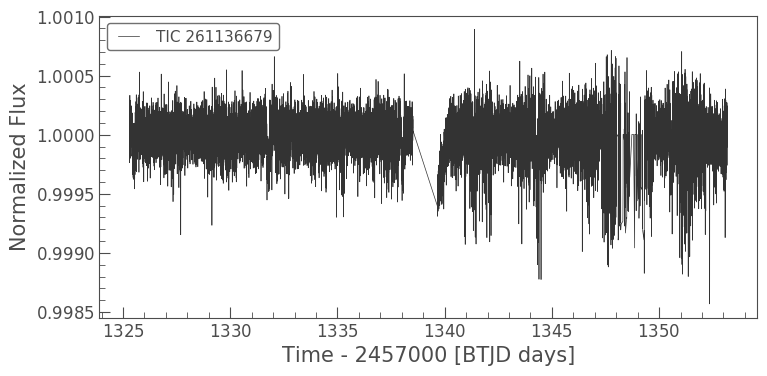

In [6]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.plot()

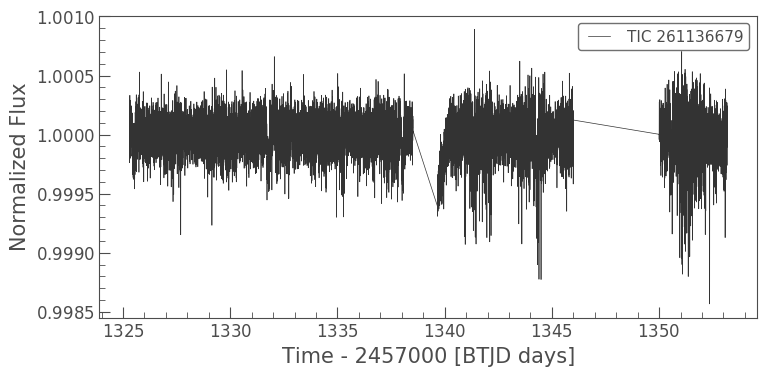

In [11]:
mask = (flat_lc.time < 1346) | (flat_lc.time > 1350)
masked_lc = flat_lc[mask].remove_nans()
masked_lc.plot()

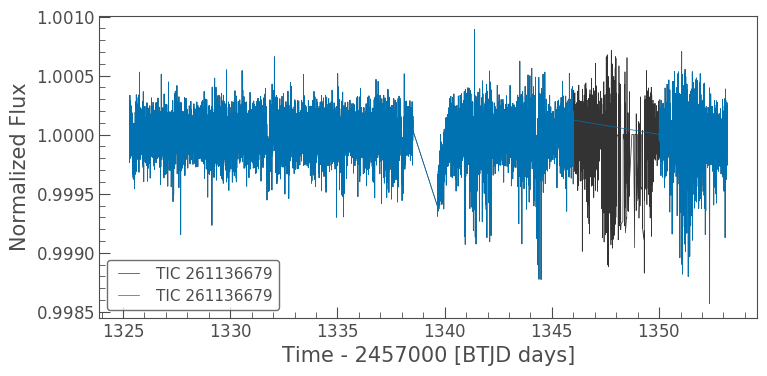

In [12]:
ax = flat_lc.plot()
masked_lc.plot(ax=ax)

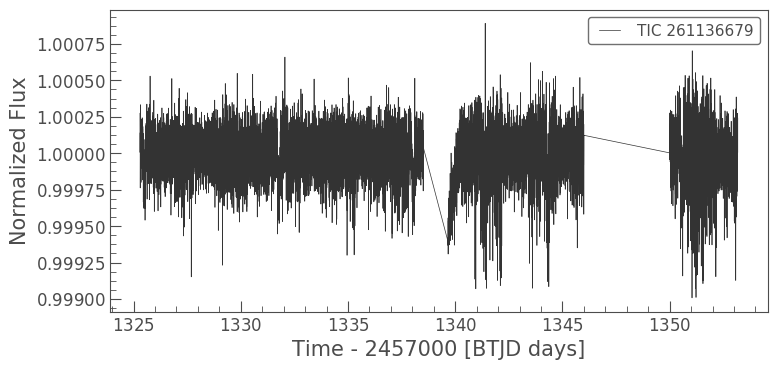

In [13]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.plot()

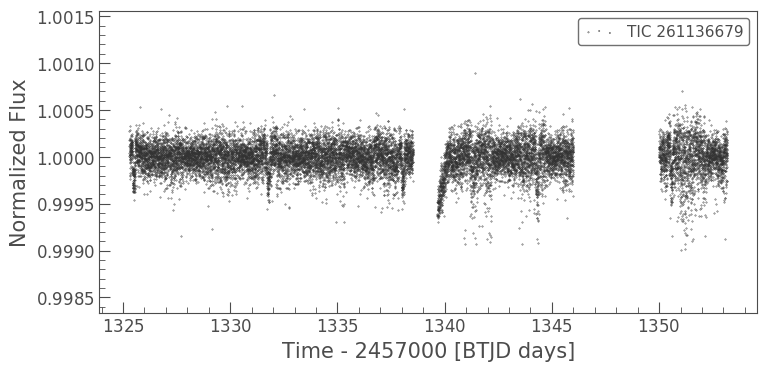

In [14]:
clipped_lc.scatter(s=0.1)

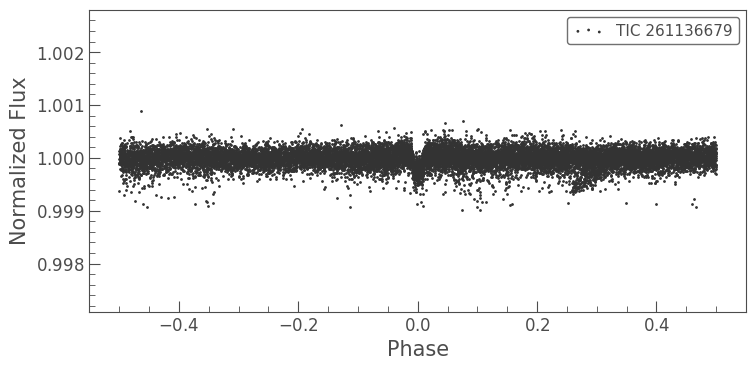

In [15]:
clipped_lc.fold(period=6.27,transit_midpoint=1325.5).scatter()

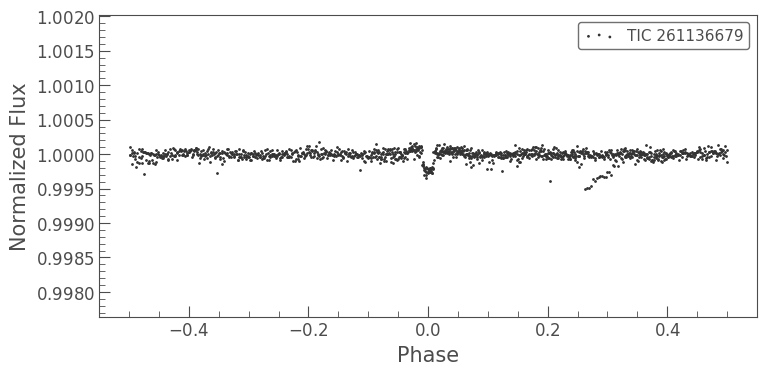

In [16]:
clipped_lc.bin().fold(period=6.27,transit_midpoint=1325.5).scatter()

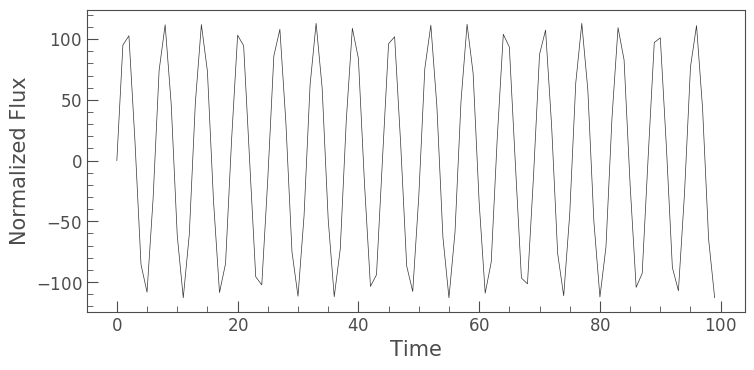

In [19]:
import lightkurve
x = np.arange(100)
y = np.sin(x)
test = lightkurve.LightCurve(x, y)
test.plot()